In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import csv
from ast import literal_eval
import pandas as pd

In [3]:
data = pd.read_csv("n_Data.csv", sep=",")
data.head(5)

,type 0,type 1,type 2,type 3,type 4,type 5,type 6,type 7,type 8,type 9,...,type 30,type 31,type 32,type 33,type 34,type 35,type 36,type 37,type 38,type 39
0,13,6,4,9,8,11,9,18,18,11,...,171,170,184,182,198,175,183,208,212,227
1,14,12,18,14,35,26,21,34,37,21,...,39,28,45,69,52,65,67,74,90,83
2,7,8,38,10,26,32,14,15,13,25,...,63,66,63,64,61,57,72,80,81,86
3,5,7,9,9,4,5,10,12,17,20,...,15,31,32,41,25,27,31,49,65,93
4,26,3,21,22,22,32,7,16,20,29,...,51,50,62,58,54,55,96,137,127,163


In [4]:
seq = 10
type = ["type %d"%i for i in range(data.shape[1])]
type_x = ["type %d"%i for i in range(data.shape[1]-seq)]
#type_y = ["type %d"%i for i in range(data.shape[1]-1,data.shape[1]-6,-1)]
type_y = ["type %d"%i for i in range(data.shape[1]-seq,data.shape[1])]

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = type
df_scaled = scaler.fit_transform(data[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

#print(df_scaled)

In [7]:
train = df_scaled[:400]
test = df_scaled[400:]

In [8]:
def make_dataset(data, label, window_size = 40-seq):
    feature_list = []
    label_list = []
#     for i in range(len(data) - window_size):
#         feature_list.append(np.array(data.iloc[i:i+window_size]))
#         label_list.append(np.array(label.iloc[i+window_size]))
    for i in range(data.shape[0]):
        feature_list.append(np.array(data.iloc[i]))
        label_list.append(np.array(label.iloc[i]))
    
    return np.array(feature_list), np.array(label_list)

In [10]:
feature_cols = type_x
label_cols = type_y

train_feature = train[feature_cols]
train_label = train[label_cols]


train_feature, train_label = make_dataset(train_feature, train_label, 40-seq)

train_feature = train_feature.reshape(train_feature.shape[0],train_feature.shape[1],1)
train_label = train_label.reshape(train_label.shape[0],train_label.shape[1],1)
# print(train_label.shape)

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.1)

x_train.shape, x_valid.shape

((360, 30, 1), (40, 30, 1))

In [12]:
#train_feature[1]

In [13]:
train_feature.shape

(400, 30, 1)

In [14]:
test_feature = test[feature_cols]
test_label = test[label_cols]

In [15]:
test_feature, test_label = make_dataset(test_feature,test_label)

test_feature = test_feature.reshape(test_feature.shape[0],test_feature.shape[1],1)
test_label = test_label.reshape(test_label.shape[0],test_label.shape[1],1)

test_feature.shape, test_label.shape

((100, 30, 1), (100, 10, 1))

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16,
              input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False)
              )
model.add(Dense(seq))

In [17]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mse'])

history = model.fit(x_train, y_train,
                   epochs=30,
                   batch_size=16,
                   validation_data=(x_valid, y_valid)
                   )

Epoch 1/30
23/23 [==============================] - 1s 35ms/step - loss: 0.1184 - mae: 0.2303 - mse: 0.1184 - val_loss: 0.1042 - val_mae: 0.1892 - val_mse: 0.1042
Epoch 2/30
23/23 [==============================] - 1s 27ms/step - loss: 0.0734 - mae: 0.1807 - mse: 0.0734 - val_loss: 0.0495 - val_mae: 0.1564 - val_mse: 0.0495
Epoch 3/30
23/23 [==============================] - 1s 28ms/step - loss: 0.0417 - mae: 0.1541 - mse: 0.0417 - val_loss: 0.0305 - val_mae: 0.1323 - val_mse: 0.0305
Epoch 4/30
23/23 [==============================] - 1s 27ms/step - loss: 0.0306 - mae: 0.1389 - mse: 0.0306 - val_loss: 0.0219 - val_mae: 0.1190 - val_mse: 0.0219
Epoch 5/30
23/23 [==============================] - 1s 27ms/step - loss: 0.0257 - mae: 0.1315 - mse: 0.0257 - val_loss: 0.0184 - val_mae: 0.1115 - val_mse: 0.0184
Epoch 6/30
23/23 [==============================] - 1s 26ms/step - loss: 0.0233 - mae: 0.1264 - mse: 0.0233 - val_loss: 0.0166 - val_mae: 0.1050 - val_mse: 0.0166
Epoch 7/30
23/23 [====

In [27]:
pred = model.predict(test_feature)

In [28]:
print(test_feature.shape)

test_label = test_label.reshape(test_label.shape[0],test_label.shape[1])
print(test_label.shape)

print(pred.shape)

(100, 30, 1)
(100, 10)
(100, 10)


In [29]:
tl = test_label.reshape(test_label.shape[0],test_label.shape[1],1)
pl = pred.reshape(pred.shape[0],pred.shape[1],1)
print(test_feature.shape)
print(pred.shape)
# p = test_feature + pred

(100, 30, 1)
(100, 10)


In [59]:
d = df_scaled

In [60]:
d.iloc[0]

type 0     0.300000
type 1     0.121212
type 2     0.028571
type 3     0.193548
type 4     0.157895
type 5     0.188679
type 6     0.125000
type 7     0.297872
type 8     0.265625
type 9     0.127273
type 10    0.041096
type 11    0.095238
type 12    0.303797
type 13    0.087500
type 14    0.274725
type 15    0.358333
type 16    0.641667
type 17    0.510490
type 18    0.851852
type 19    0.848101
type 20    0.903382
type 21    0.816327
type 22    0.938144
type 23    0.852217
type 24    0.627907
type 25    0.960199
type 26    0.726457
type 27    0.645833
type 28    0.703557
type 29    0.683206
type 30    0.655039
type 31    0.669323
type 32    0.709302
type 33    0.716000
type 34    0.754864
type 35    0.703704
type 36    0.737500
type 37    0.847737
type 38    0.795455
type 39    0.831461
Name: 0, dtype: float64

In [56]:
scaler.inverse_transform(d)

array([[ 25.,  10.,   5., ..., 414., 422., 449.],
       [ 27.,  22.,  33., ..., 146., 178., 161.],
       [ 13.,  14.,  73., ..., 158., 160., 167.],
       ...,
       [ 35.,  12.,  25., ...,  28.,  46.,  43.],
       [ 79.,  38.,  39., ...,  34.,  52.,  49.],
       [ 23.,   2.,  41., ...,  26.,  36.,  35.]])

In [44]:
tl = tl.reshape(100,10)
print(tl.shape)

(100, 10)


In [45]:
tp = pd.DataFrame(tl)

In [49]:
df_scaled.shape

(500, 40)

In [50]:
tp.shape

(100, 10)

In [47]:
scaler.inverse_transform(tp)

ValueError: operands could not be broadcast together with shapes (100,10) (40,) (100,10) 

In [21]:
z1 = np.concatenate((test_feature[20],tl[20]))
z2 = np.concatenate((test_feature[20],pl[20]))

In [30]:
print(z1)

[[0.525     ]
 [0.54545455]
 [0.08571429]
 [0.06451613]
 [0.44736842]
 [0.20754717]
 [0.30357143]
 [0.        ]
 [0.        ]
 [0.36363636]
 [0.31506849]
 [0.26190476]
 [0.15189873]
 [0.0625    ]
 [0.0989011 ]
 [0.125     ]
 [0.15833333]
 [0.15384615]
 [0.28888889]
 [0.2278481 ]
 [0.22705314]
 [0.15816327]
 [0.25773196]
 [0.13300493]
 [0.22790698]
 [0.20895522]
 [0.25560538]
 [0.26666667]
 [0.22529644]
 [0.22137405]
 [0.25193798]
 [0.28685259]
 [0.38372093]
 [0.42      ]
 [0.40466926]
 [0.4691358 ]
 [0.5625    ]
 [0.6090535 ]
 [0.64015152]
 [0.67790262]]


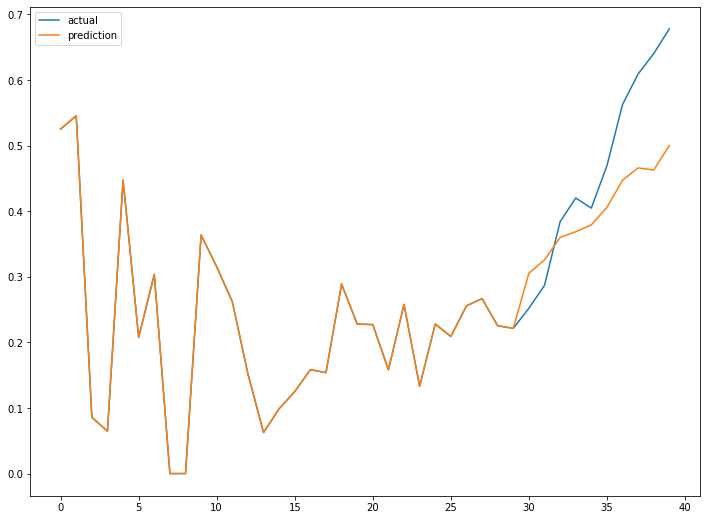

In [21]:
plt.figure(figsize=(12,9))
#plt.plot(test_label[4], label='actual')
#plt.plot(test_feature[4], label='actual')
#plt.plot(pred[4], label='prediction')
plt.plot(z1 ,label='actual')
plt.plot(z2, label='prediction')
plt.legend()
plt.show()

In [85]:
from scipy.ndimage.filters import gaussian_filter1d

In [95]:
y1 = gaussian_filter1d(z1, sigma=10)
y2 = gaussian_filter1d(z2, sigma=10)

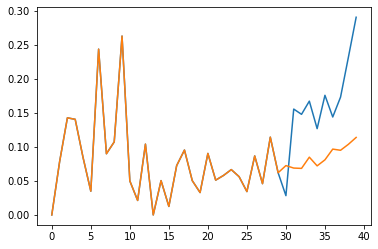

In [97]:
plt.plot(y1 ,label='actual')
plt.plot(y2, label='prediction')